In [3]:
#house price prediction using linear regression
# Source Code Copied From https://www.kaggle.com/code/subashdump/california-housing-price-prediction
#https://www.kaggle.com/code/meetnagadia/california-housing-price-prediction-regression
#with some modifications
#Import Libraries
import pandas as pd    #Pandas is used to analyze data
from sklearn.model_selection import train_test_split
import numpy as np     #This library contains a large number of mathematical, algebraic, and transformation functions
import matplotlib.pyplot as plt    # Used for Visualization of data
import seaborn as sns    #Seaborn is a Python data visualization library based on matplotlib
%matplotlib inline

In [4]:
#Loading Dataset
data=pd.read_csv("D:/Dataset/housing.csv")

In [5]:
#Dataset Rows * Coloums
data.shape

(20640, 10)

In [6]:
#Display Data Head
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
#Data Set Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
#Dataset Statistics
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


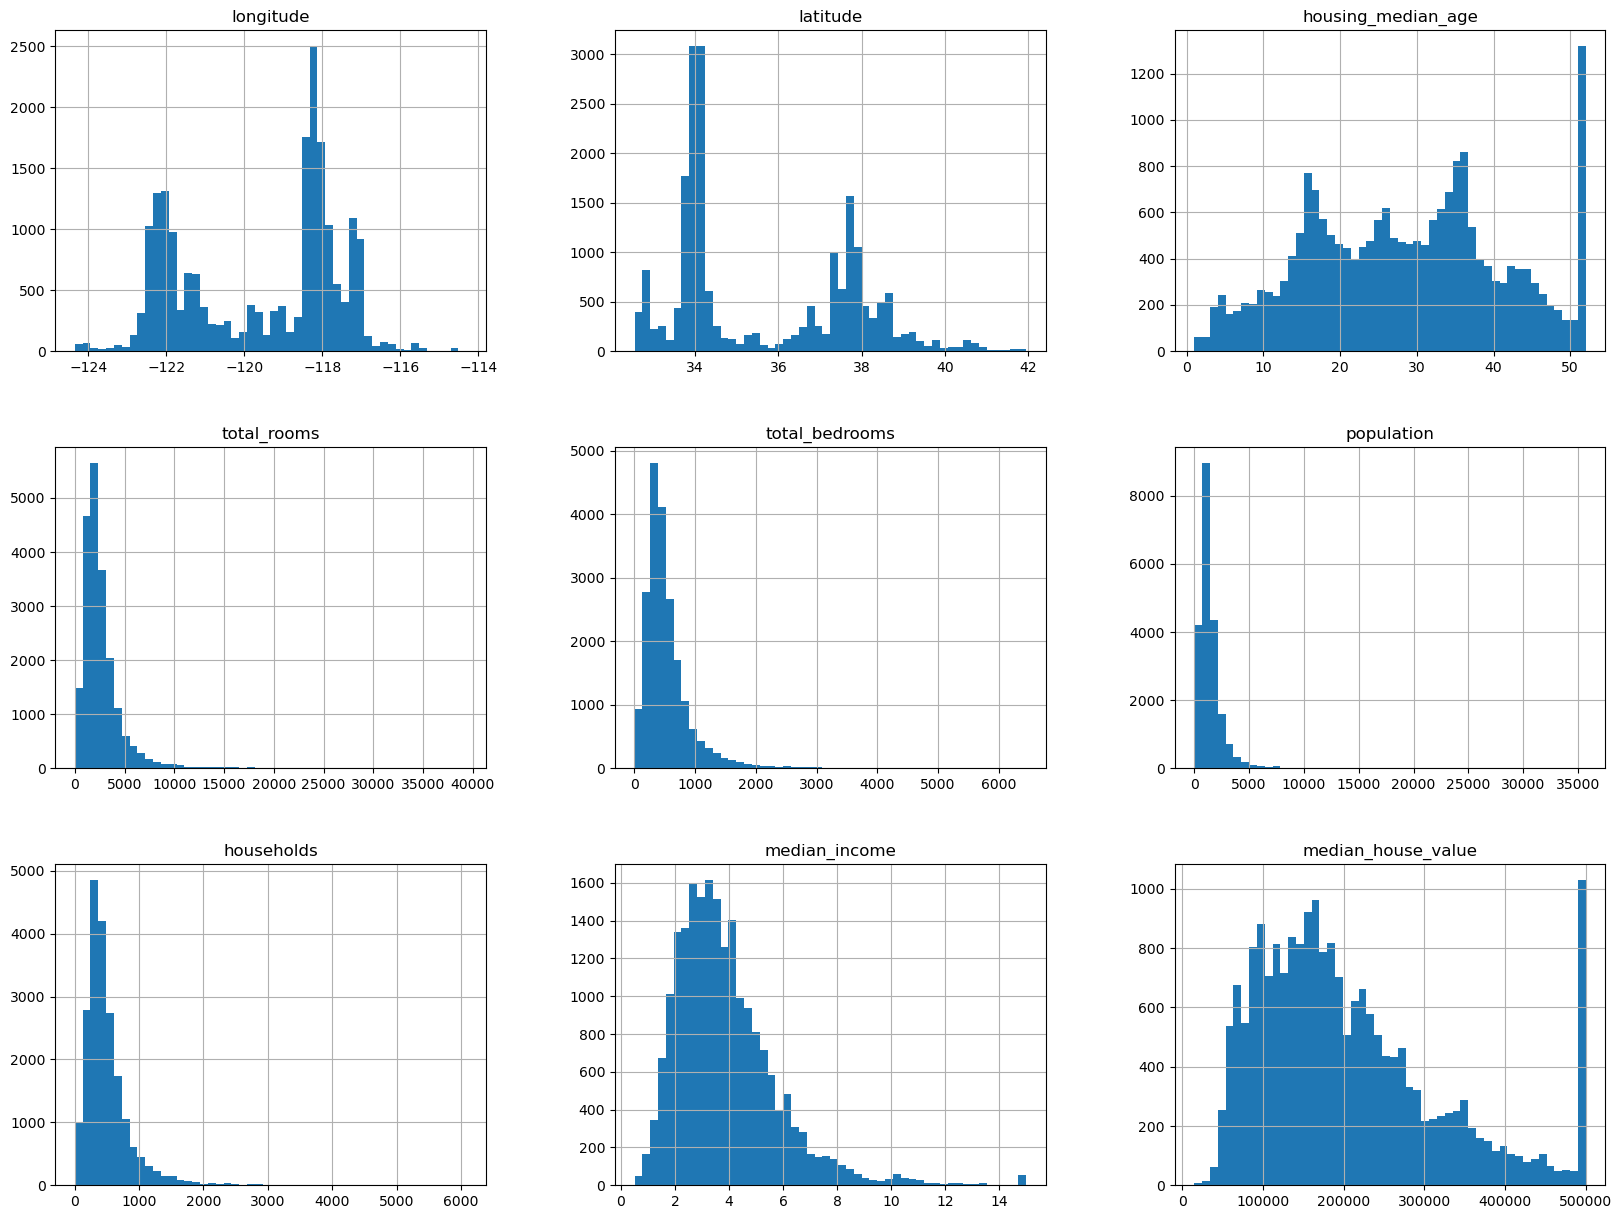

In [9]:
data.hist(bins=50, figsize=(20,15))
plt.show()

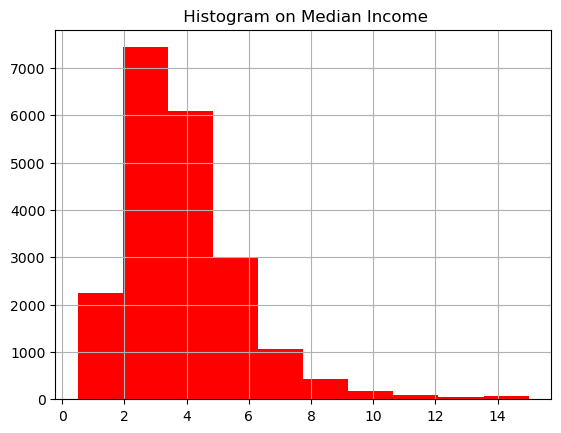

In [12]:
# Histogram on Median Income

data['median_income'].hist(color='r')
plt.title(' Histogram on Median Income')
plt.show()

In [13]:
#Categorize the Income
data['income_cat']=pd.cut(data['median_income'],
                    bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
                    labels=[1,2,3,4,5])
data['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [14]:
X=data.drop('median_house_value',axis=1)

y=data['median_house_value']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<Axes: >

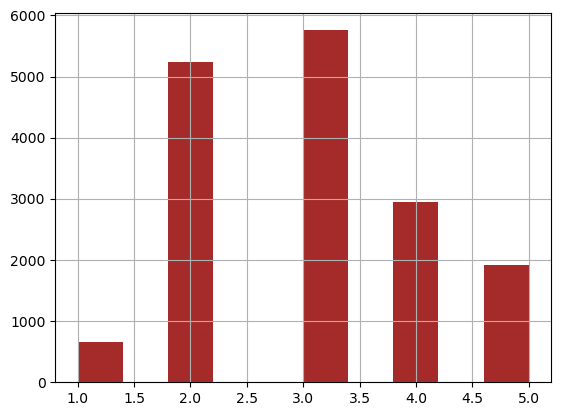

In [16]:
# Visualizing our income_cat column from Training dataset

X_train['income_cat'].hist(color='brown')

<Axes: >

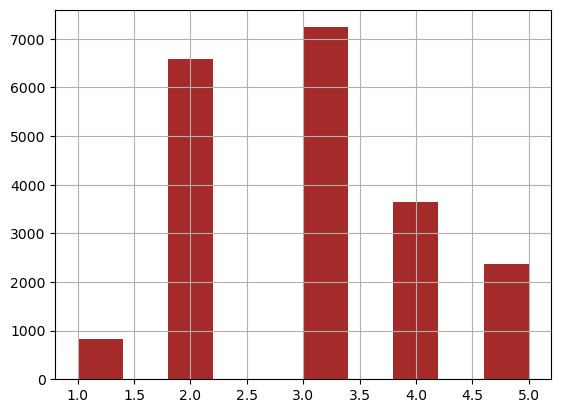

In [17]:
# Visualizing our income_cat column from Actual dataset

data['income_cat'].hist(color='brown')

In [18]:
#using Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(data,data['income_cat']):
    strat_train_data=data.loc[train_index]
    strat_test_data=data.loc[test_index]

<Axes: >

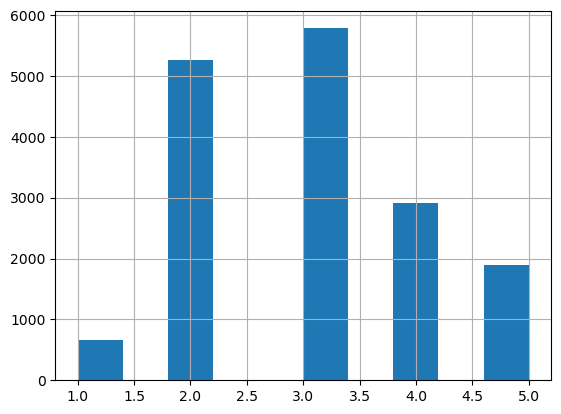

In [19]:
# Verifying Proper Distribution of Income cat using Histogram

strat_train_data['income_cat'].hist()

In [20]:
#Drop income_cat
strat_train_data.drop('income_cat',axis=1,inplace=True)
strat_test_data.drop('income_cat',axis=1,inplace=True)

In [21]:
# Creating copy of strat_train_data
housing=strat_train_data.copy()

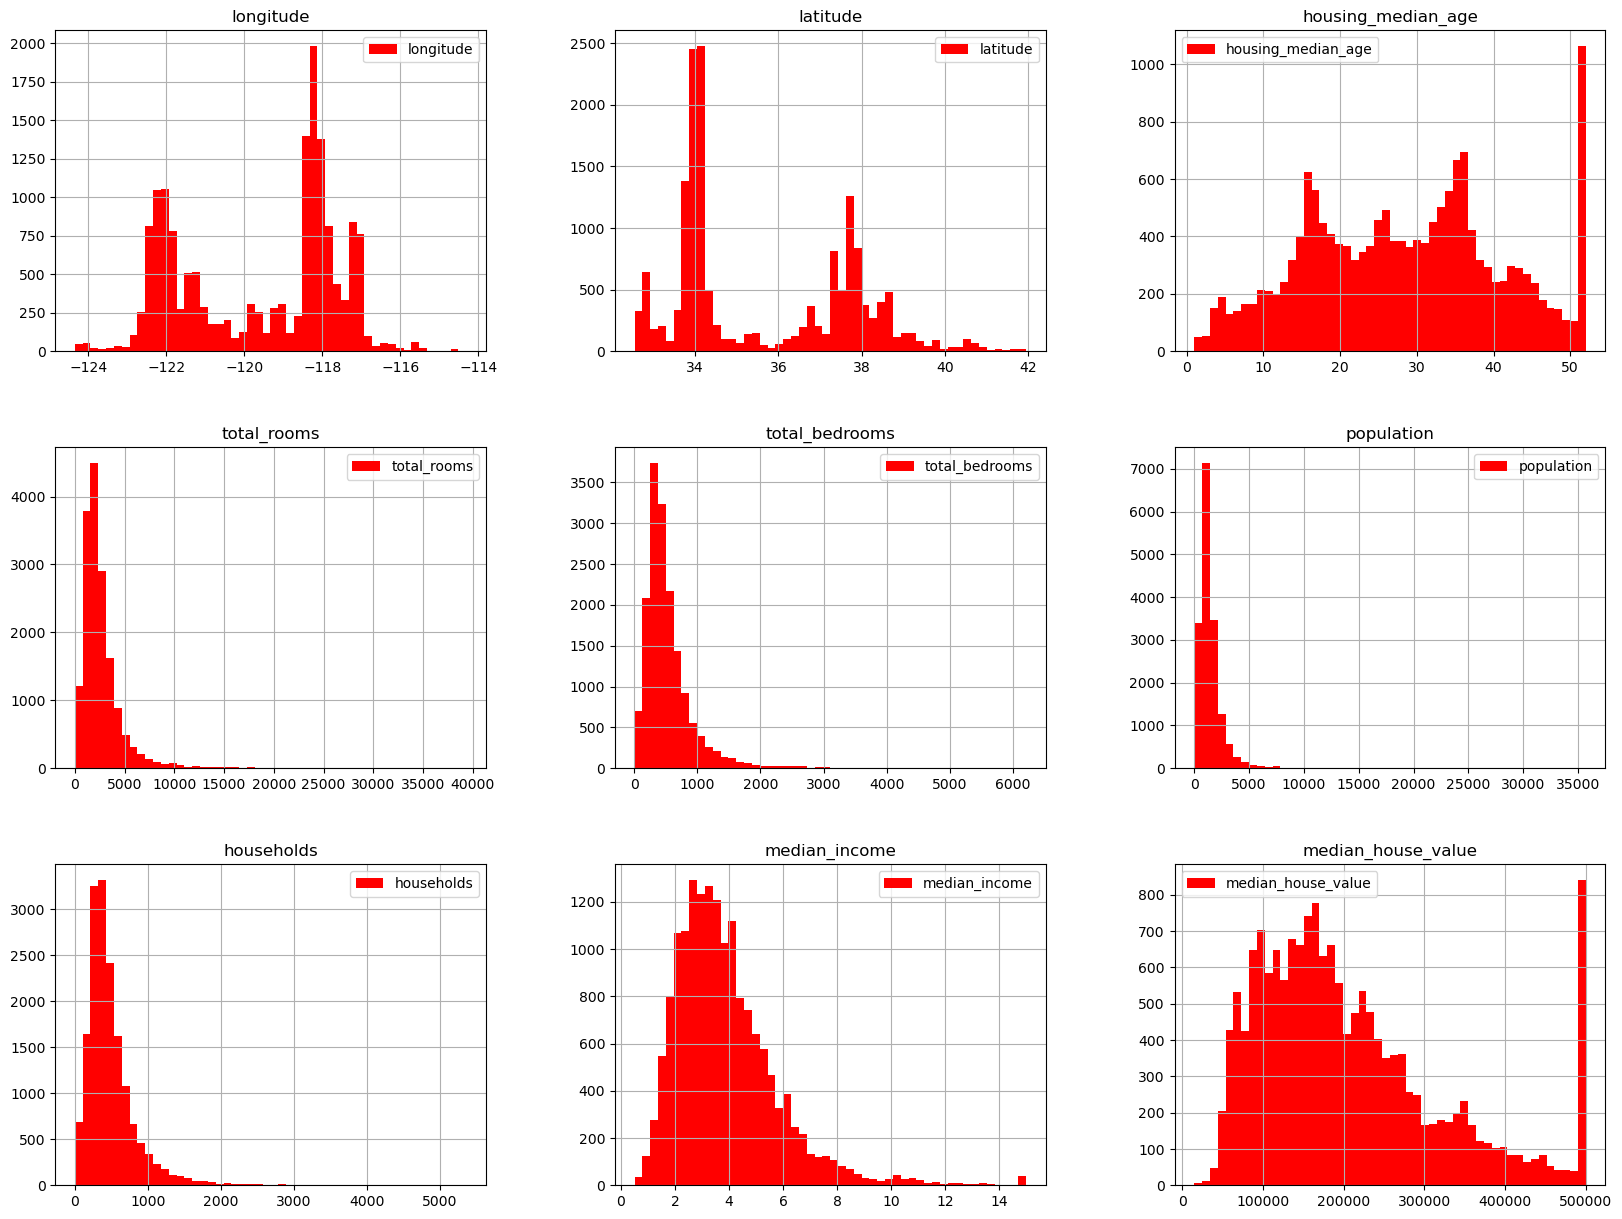

In [22]:
# Visualizing housing 
housing.hist(bins=50,figsize=(20,15),legend="Housing Data",color='r')
plt.show()

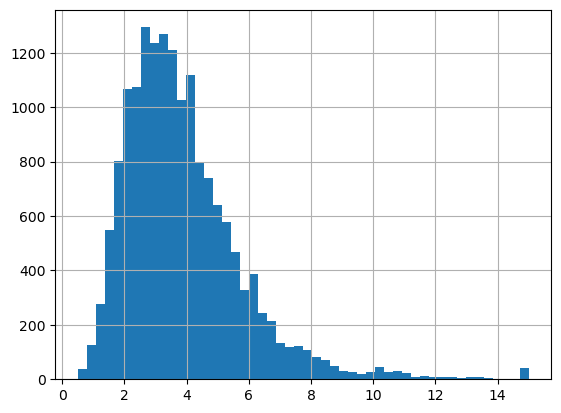

In [23]:
#median_income histogram
housing['median_income'].hist(bins=50)
plt.show()

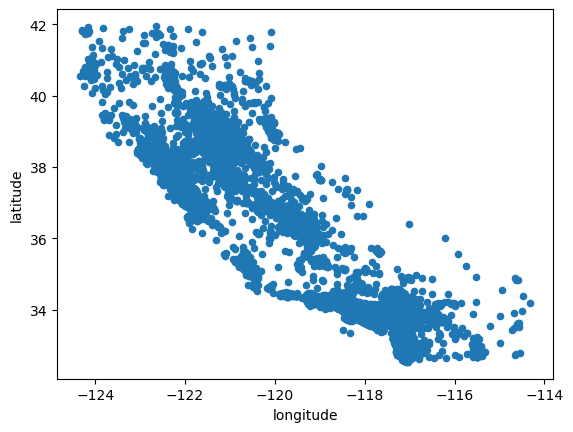

In [24]:
#ScatterPlot 
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

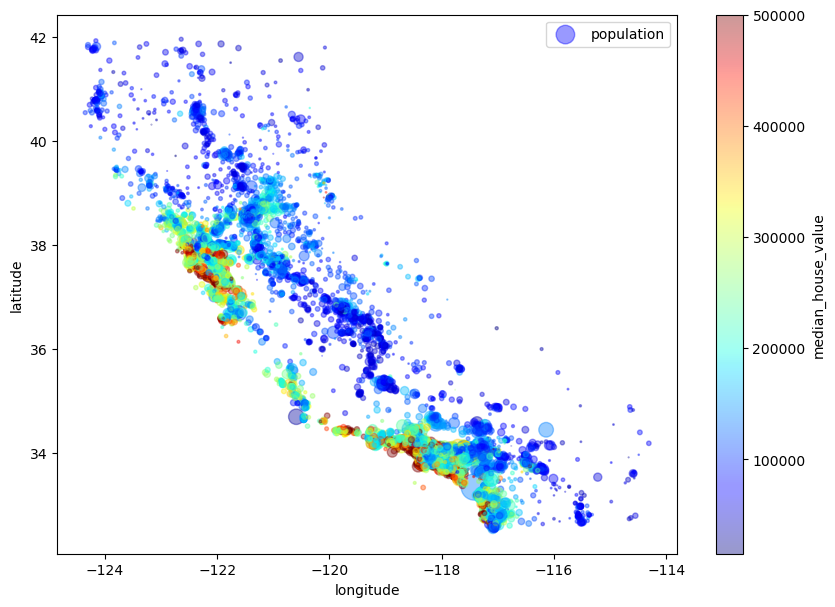

In [28]:
#longitude and latitude with median_house_value
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100,label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
            sharex=False)
plt.show()

In [30]:
#Display the corelation
z= housing.iloc[:,:-1].corr()
print (z)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_

In [32]:
# Droping median_house_value using drop()
housing=strat_train_data.drop("median_house_value",axis=1)

In [34]:
# Making a copy

housing_labels=strat_train_data['median_house_value'].copy()

In [36]:
# Find Incomplete Rows
sample_incomplete_rows=housing[housing.isnull().any(axis=1)].head()

In [38]:
sample_incomplete_rows.drop("total_bedrooms",axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26,2947,825,626,2.9330,NEAR BAY
10915,-117.87,33.73,45,2264,1970,499,3.4193,<1H OCEAN
19150,-122.70,38.35,14,2313,954,397,3.7813,<1H OCEAN
4186,-118.23,34.13,48,1308,835,294,4.2891,<1H OCEAN
16885,-122.40,37.58,26,3281,1145,480,6.3580,NEAR OCEAN


In [40]:
# Calculating meadian of total_bedrooms

median=housing["total_bedrooms"].median()

In [42]:
print(median)

433.0


In [62]:
# Fill Incomplete rows with Median
sample_incomplete_rows['total_bedrooms']=sample_incomplete_rows['total_bedrooms'].fillna(median)

In [64]:
#print updated rows
print(sample_incomplete_rows)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                  26         2947           433.0   
10915    -117.87     33.73                  45         2264           433.0   
19150    -122.70     38.35                  14         2313           433.0   
4186     -118.23     34.13                  48         1308           433.0   
16885    -122.40     37.58                  26         3281           433.0   

       population  households  median_income ocean_proximity  
1606          825         626         2.9330        NEAR BAY  
10915        1970         499         3.4193       <1H OCEAN  
19150         954         397         3.7813       <1H OCEAN  
4186          835         294         4.2891       <1H OCEAN  
16885        1145         480         6.3580      NEAR OCEAN  


In [60]:
sample_incomplete_rows.shape

(5, 9)

In [73]:
#using SimpleImputer to handle the missing data 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num=housing.select_dtypes(include=[np.number])
print(housing_num)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                  29         3873           797.0   
15502    -117.23     33.09                   7         5320           855.0   
2908     -119.04     35.37                  44         1618           310.0   
14053    -117.13     32.75                  24         1877           519.0   
20496    -118.70     34.28                  27         3536           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                  14         6665          1231.0   
12661    -121.42     38.51                  15         7901          1422.0   
19263    -122.72     38.44                  48          707           166.0   
19140    -122.70     38.31                  14         3155           580.0   
19773    -122.14     39.97                  27         1079           222.0   

       population  households  median_income  
1265

In [75]:
# Fit  numerical housing dataset, strategy = median, and perform transforamtion 
imputer.fit(housing_num)
SimpleImputer(strategy='median')
X=imputer.transform(housing_num)

In [77]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns, index=housing_num.index)
print(housing_tr)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
1265

In [79]:
# Change Ocean Proximity to numerical value using Ordinal Encoding

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [81]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Printing first 10 rows to verify
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [83]:
print(ordinal_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [89]:
#using one hot encoding to convert categorical variables into a numerical format
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder(sparse_output=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [91]:
# feature_engineering to add new features to dataset
def feature_engineering(data):
    data['bedrooms_per_household']=data['total_bedrooms'] / data['households']
    data['population_per_household']=data['population'] / data['households']
    data['rooms_per_household']=data['total_rooms'] / data['households']
    return data

In [93]:
housing_feature_engineered=feature_engineering(housing_num)
print(housing_feature_engineered)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                  29         3873           797.0   
15502    -117.23     33.09                   7         5320           855.0   
2908     -119.04     35.37                  44         1618           310.0   
14053    -117.13     32.75                  24         1877           519.0   
20496    -118.70     34.28                  27         3536           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                  14         6665          1231.0   
12661    -121.42     38.51                  15         7901          1422.0   
19263    -122.72     38.44                  48          707           166.0   
19140    -122.70     38.31                  14         3155           580.0   
19773    -122.14     39.97                  27         1079           222.0   

       population  households  median_income  bedro

In [97]:
#Scaling data to standardizes a features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
housing_scaled=scaler.fit_transform(housing_feature_engineered)
print(housing_scaled)

[[-0.94135046  1.34743822  0.02756357 ...  0.05896205  0.00622264
   0.01739526]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.02830837 -0.04081077
   0.56925554]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.1286475  -0.07537122
  -0.01802432]
 ...
 [-1.5707942   1.31001828  1.53856552 ... -0.26257303 -0.03743619
  -0.5092404 ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.11548226 -0.05915604
   0.32814891]
 [-1.28105026  2.02567448 -0.13148926 ...  0.05505203  0.00657083
   0.01407228]]


In [107]:
housing=strat_train_data.drop("median_house_value",axis=1)

housing_labels=strat_train_data['median_house_value'].copy()

def data_tranformation(datas):
    if "median_house_value" in data.columns:
        labels=datas['median_house_value']
        datas=datas.drop('median_house_value',axis=1)
    else:
        labels=None
        
    feature_engineered_data=feature_engineering(datas)
    features=list(feature_engineered_data.columns)
    
    from sklearn.impute import SimpleImputer
    imputer=SimpleImputer(strategy='median')
    
    housing_num=feature_engineered_data.select_dtypes(include=[np.number])
    imputed=imputer.fit_transform(housing_num)
    
    housing_cat=feature_engineered_data.select_dtypes(exclude=[np.number])
    
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder=OneHotEncoder(sparse_output=False)
    housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
    features=features+cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity")
    
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    housing_scaled=scaler.fit_transform(imputed)
    output=np.hstack([housing_scaled,housing_cat_1hot])
    
    return output,labels,features 

In [109]:
#Transform train data
train_data,train_labels,features=data_tranformation(strat_train_data)
print(train_data)

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]


In [111]:
#Transform test data
test_data,test_labels,features=data_tranformation(strat_test_data)
print(test_data)

[[ 0.57507019 -0.69657252  0.0329564  ...  0.          0.
   0.        ]
 [-0.43480141 -0.33466769 -0.36298077 ...  0.          0.
   0.        ]
 [ 0.54522177 -0.63547171  0.58726843 ...  0.          0.
   0.        ]
 ...
 [-0.08656982 -0.54617051  1.14158047 ...  0.          0.
   0.        ]
 [ 0.81385757 -0.92687559  0.11214383 ...  0.          0.
   0.        ]
 [ 0.49049967 -0.66367208  0.58726843 ...  0.          0.
   0.        ]]


In [113]:
print(features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'bedrooms_per_household', 'population_per_household', 'rooms_per_household', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


In [115]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(train_data,train_labels)

LinearRegression()

In [119]:
# Print Original values vs Predicted values
original_values= test_labels[:5]
predicted_values=lin_reg.predict(test_data[:5])
comparision_dataframe=pd.DataFrame(data={"Original values":original_values,"Predicted values":predicted_values})
print(comparision_dataframe)

       Original values  Predicted values
5241            500001     421436.985982
17352           162500     288955.577066
3505            204600     244465.297215
7777            159700     195506.027223
14155           184000     259951.750767


In [121]:
# MSE simply refers to the mean of the squared difference between the predicted parameter and the observed parameter.

from sklearn.metrics import mean_squared_error

lin_mse=mean_squared_error(original_values,predicted_values)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

78489.87096668074


In [124]:
# The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. 
# It measures accuracy for continuous variables.

from sklearn.metrics import mean_absolute_error

lin_mae=mean_absolute_error(original_values,predicted_values)
lin_mae

71328.5332577832